# Importing Libariries

In [1]:
import os
import pickle
import pandas as pd
import numpy as np

# Processing the data

In [ ]:
data_path = 'WESAD/WESAD'
subjects = [f for f in os.listdir(data_path) if f.startswith('S')]
data_frames = []

for subject in subjects:
    subject_path = os.path.join(data_path, subject, f'{subject}.pkl')
    with open(subject_path, 'rb') as file:
        data = pickle.load(file, encoding='latin1')

    chest_data = data['signal']['chest']
    wrist_data = data['signal']['wrist']
    stress = data['label']

    chest_sensor_dfs = []
    for sensor_name, sensor_values in chest_data.items():
        sensor_array = np.array(sensor_values)
        if sensor_array.ndim == 1:
            sensor_array = sensor_array.reshape(-1, 1)
        num_axes = sensor_array.shape[1]
        col_names = [f'chest_{sensor_name}_{i}' for i in range(num_axes)]
        chest_sensor_df = pd.DataFrame(sensor_array, columns=col_names)
        chest_sensor_dfs.append(chest_sensor_df)
    chest_df = pd.concat(chest_sensor_dfs, axis=1)

    wrist_sensor_dfs = []
    for sensor_name, sensor_values in wrist_data.items():
        sensor_array = np.array(sensor_values)
        if sensor_array.ndim == 1:
            sensor_array = sensor_array.reshape(-1, 1)
        num_axes = sensor_array.shape[1]
        col_names = [f'wrist_{sensor_name}_{i}' for i in range(num_axes)]
        wrist_sensor_df = pd.DataFrame(sensor_array, columns=col_names)
        wrist_sensor_dfs.append(wrist_sensor_df)
    wrist_df = pd.concat(wrist_sensor_dfs, axis=1)

    subject_df = pd.concat([chest_df, wrist_df], axis=1)
    subject_df['stress'] = stress
    subject_df['subject'] = subject
    subject_df = subject_df.head(10000)
    data_frames.append(subject_df)

data_df = pd.concat(data_frames, ignore_index=True)
data_df.to_csv('data.csv', index=False)

# Data Pre-processing

In [7]:
df = pd.read_csv('data.csv')
print(f"Rows: {data_df.shape[0]}, Columns: {data_df.shape[1]}")

Rows: 150000, Columns: 16


In [9]:
df.drop(columns=['stress'], inplace=True)
print(df.isnull().sum())

chest_ACC_0     0
chest_ACC_1     0
chest_ACC_2     0
chest_ECG_0     0
chest_EMG_0     0
chest_EDA_0     0
chest_Temp_0    0
chest_Resp_0    0
wrist_ACC_0     0
wrist_ACC_1     0
wrist_ACC_2     0
wrist_BVP_0     0
wrist_EDA_0     0
wrist_TEMP_0    0
subject         0
dtype: int64


In [11]:
df.head()

,chest_ACC_0,chest_ACC_1,chest_ACC_2,chest_ECG_0,chest_EMG_0,chest_EDA_0,chest_Temp_0,chest_Resp_0,wrist_ACC_0,wrist_ACC_1,wrist_ACC_2,wrist_BVP_0,wrist_EDA_0,wrist_TEMP_0,subject
0,1.1278,0.1520,0.3416,-1.333694,-0.013687,0.716019,33.695860,0.213623,107.0,-105.0,127.0,10.17,0.349215,33.13,S10
1,1.0932,0.1888,0.2922,-1.327744,-0.021927,0.714493,33.741333,0.192261,67.0,-52.0,45.0,12.04,0.346656,33.16,S10
2,1.0354,0.2094,0.1858,-1.322067,-0.009018,0.715637,33.717070,0.205994,26.0,40.0,0.0,13.01,0.350494,33.16,S10
3,0.9666,0.2118,0.0412,-1.316345,-0.002380,0.714874,33.741333,0.193787,52.0,12.0,46.0,13.07,0.336423,33.16,S10
4,0.8916,0.2040,-0.1228,-1.310257,0.001053,0.715256,33.747406,0.172424,42.0,20.0,45.0,12.33,0.338981,33.16,S10


In [13]:
df.wrist_BVP_0.describe()

count    150000.000000
mean          0.048008
std          66.849314
min        -870.180000
25%         -19.910000
50%           2.810000
75%          21.520000
max        1062.430000
Name: wrist_BVP_0, dtype: float64

In [15]:
df.rename(columns={'wrist_BVP_0': 'BVP'}, inplace=True)
df['BVP'] = df['BVP'].abs()

In [17]:
df.head()

,chest_ACC_0,chest_ACC_1,chest_ACC_2,chest_ECG_0,chest_EMG_0,chest_EDA_0,chest_Temp_0,chest_Resp_0,wrist_ACC_0,wrist_ACC_1,wrist_ACC_2,BVP,wrist_EDA_0,wrist_TEMP_0,subject
0,1.1278,0.1520,0.3416,-1.333694,-0.013687,0.716019,33.695860,0.213623,107.0,-105.0,127.0,10.17,0.349215,33.13,S10
1,1.0932,0.1888,0.2922,-1.327744,-0.021927,0.714493,33.741333,0.192261,67.0,-52.0,45.0,12.04,0.346656,33.16,S10
2,1.0354,0.2094,0.1858,-1.322067,-0.009018,0.715637,33.717070,0.205994,26.0,40.0,0.0,13.01,0.350494,33.16,S10
3,0.9666,0.2118,0.0412,-1.316345,-0.002380,0.714874,33.741333,0.193787,52.0,12.0,46.0,13.07,0.336423,33.16,S10
4,0.8916,0.2040,-0.1228,-1.310257,0.001053,0.715256,33.747406,0.172424,42.0,20.0,45.0,12.33,0.338981,33.16,S10


In [19]:
df.BVP.describe()

count    150000.000000
mean         38.418641
std          54.706776
min           0.000000
25%           8.810000
50%          20.820000
75%          43.650000
max        1062.430000
Name: BVP, dtype: float64

# Visualization of Data

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

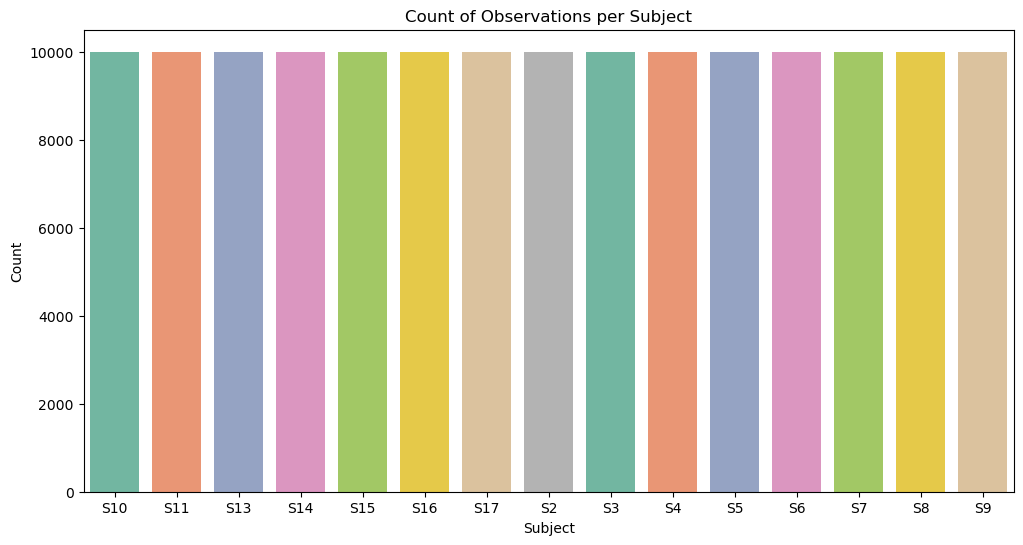

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=df, palette='Set2')
plt.title('Count of Observations per Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


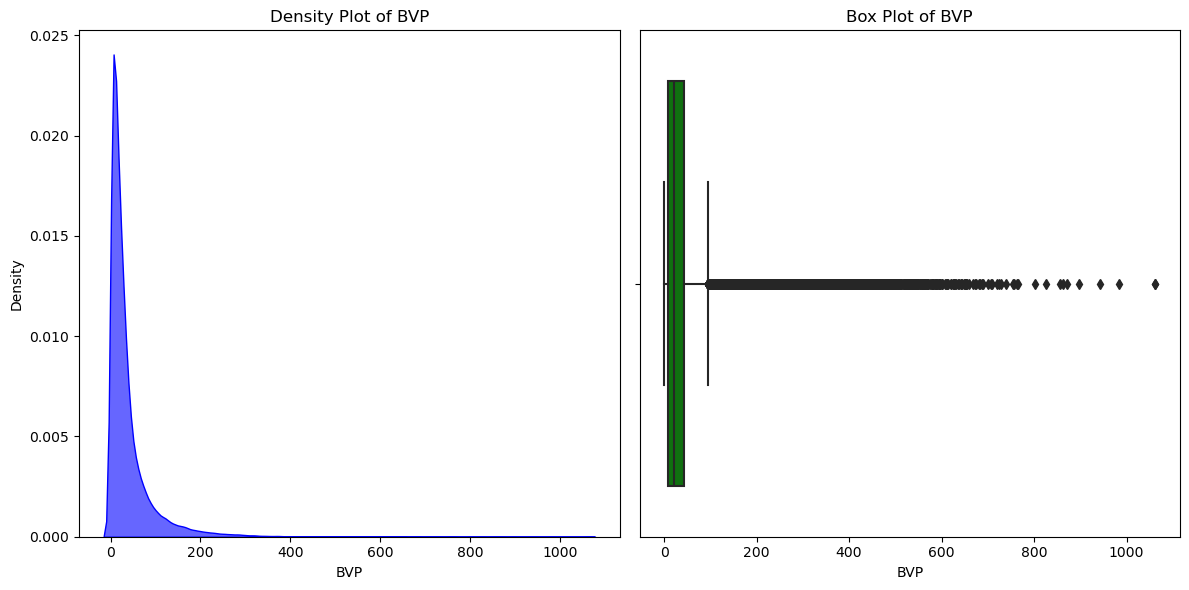

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(df['BVP'], fill=True, color='blue', alpha=0.6, ax=axes[0])
axes[0].set_title('Density Plot of BVP')
axes[0].set_xlabel('BVP')
axes[0].set_ylabel('Density')
sns.boxplot(x=df['BVP'], color='green', ax=axes[1])
axes[1].set_title('Box Plot of BVP')
axes[1].set_xlabel('BVP')
plt.tight_layout()
plt.show()

In [26]:
Q1 = df['BVP'].quantile(0.25)
Q3 = df['BVP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['BVP'] >= lower_bound) & (df['BVP'] <= upper_bound)]

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

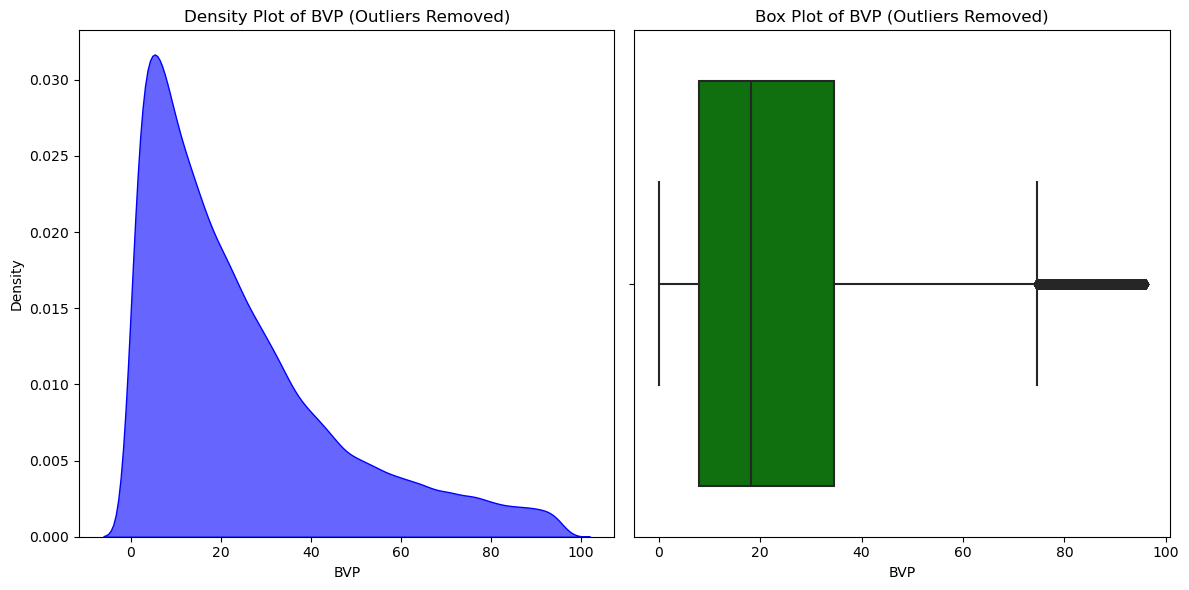

In [27]:
plt.figure(figsize=(12, 6))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(df['BVP'], fill=True, color='blue', alpha=0.6, ax=axes[0])
axes[0].set_title('Density Plot of BVP (Outliers Removed)')
axes[0].set_xlabel('BVP')
axes[0].set_ylabel('Density')
sns.boxplot(x=df['BVP'], color='green', ax=axes[1])
axes[1].set_title('Box Plot of BVP (Outliers Removed)')
axes[1].set_xlabel('BVP')
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


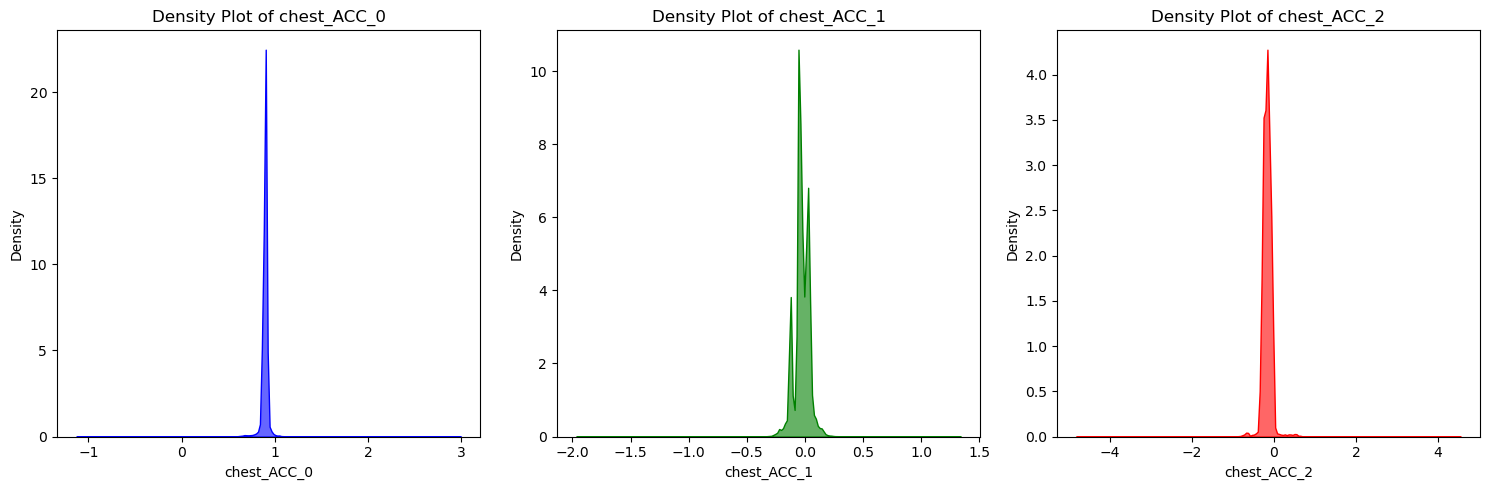

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(df['chest_ACC_0'], fill=True, color='blue', alpha=0.6, ax=axes[0])
axes[0].set_title('Density Plot of chest_ACC_0')
axes[0].set_xlabel('chest_ACC_0')
axes[0].set_ylabel('Density')
sns.kdeplot(df['chest_ACC_1'], fill=True, color='green', alpha=0.6, ax=axes[1])
axes[1].set_title('Density Plot of chest_ACC_1')
axes[1].set_xlabel('chest_ACC_1')
axes[1].set_ylabel('Density')
sns.kdeplot(df['chest_ACC_2'], fill=True, color='red', alpha=0.6, ax=axes[2])
axes[2].set_title('Density Plot of chest_ACC_2')
axes[2].set_xlabel('chest_ACC_2')
axes[2].set_ylabel('Density')
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


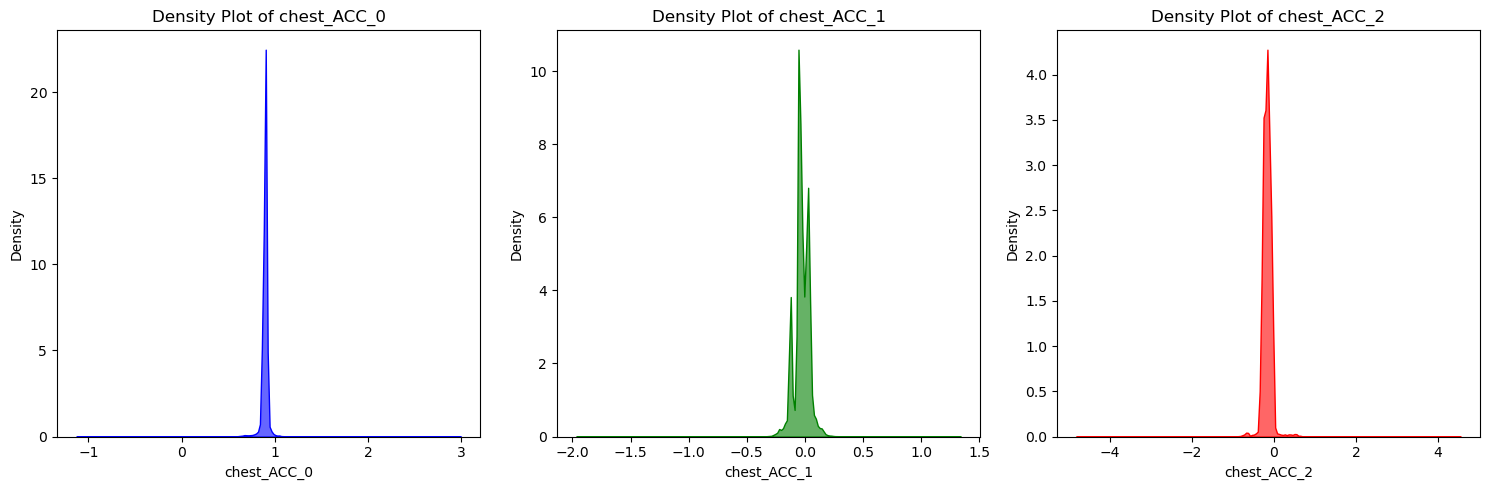

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(df['chest_ACC_0'], fill=True, color='blue', alpha=0.6, ax=axes[0])
axes[0].set_title('Density Plot of chest_ACC_0')
axes[0].set_xlabel('chest_ACC_0')
axes[0].set_ylabel('Density')
sns.kdeplot(df['chest_ACC_1'], fill=True, color='green', alpha=0.6, ax=axes[1])
axes[1].set_title('Density Plot of chest_ACC_1')
axes[1].set_xlabel('chest_ACC_1')
axes[1].set_ylabel('Density')
sns.kdeplot(df['chest_ACC_2'], fill=True, color='red', alpha=0.6, ax=axes[2])
axes[2].set_title('Density Plot of chest_ACC_2')
axes[2].set_xlabel('chest_ACC_2')
axes[2].set_ylabel('Density')
plt.tight_layout()
plt.show()

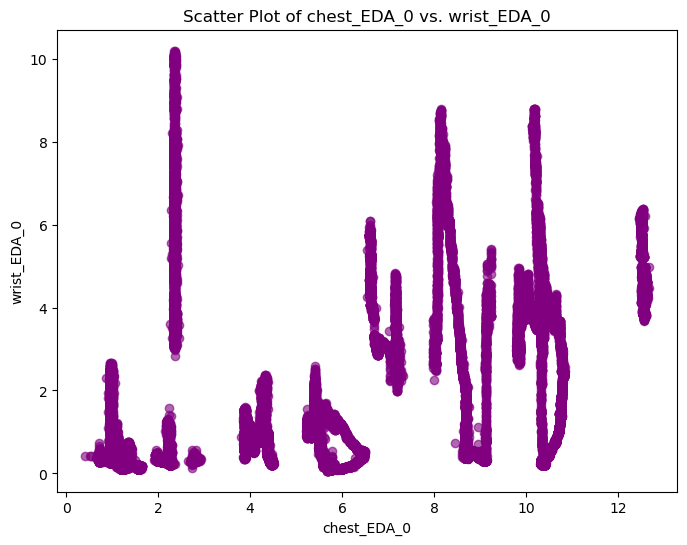

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(df['chest_EDA_0'], df['wrist_EDA_0'], alpha=0.6, color='purple')
plt.title('Scatter Plot of chest_EDA_0 vs. wrist_EDA_0')
plt.xlabel('chest_EDA_0')
plt.ylabel('wrist_EDA_0')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


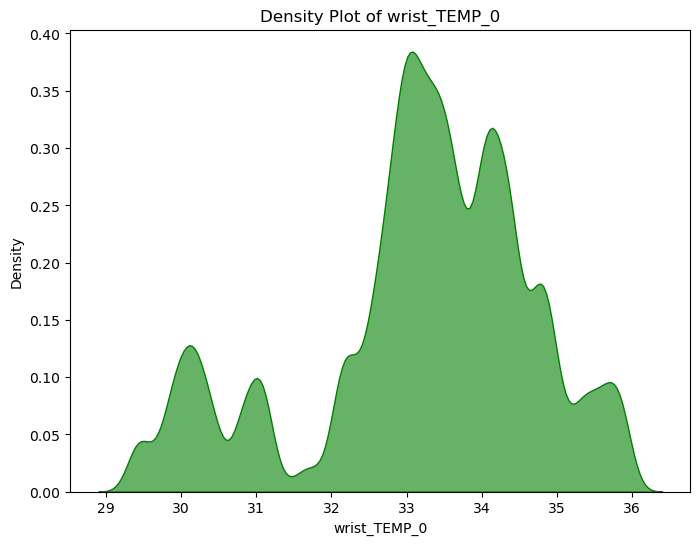

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['wrist_TEMP_0'], fill=True, color='green', alpha=0.6)
plt.title('Density Plot of wrist_TEMP_0')
plt.xlabel('wrist_TEMP_0')
plt.ylabel('Density')
plt.show()